In [1]:
# !pip uninstall tensorflow
import numpy as np
import os
import glob
import pandas as pd
import librosa
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' 

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 951526488975435091
xla_global_id: -1
]


In [4]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
from tensorflow.python.client import device_lib
physical_devices = tf.config.list_physical_devices('GPU')
physical_devices

[]

## Loding dataset

In [5]:
path = os.path.expanduser('~')
path=os.path.join(path, "Documents", "courses", "MLSP", "Audio_Classification-MLSP", "Audio_Classification-MLSP")
data_path=os.path.join(path, "train")
label_path=path
data=pd.read_csv(os.path.join(label_path, "annotations.csv"))
# npy_files = glob.glob(os.path.join(data_path, "*.npy"))

# conversion in log-mel spectogram

In [11]:
audios=[]
i=0
files=data["fname"]
for file in files:
    arr=np.load(os.path.join(data_path, file))
    m,n,o=arr.shape
    arr.resize(n,o)
#     print(arr.shape)
    mel_spect = librosa.power_to_db(arr, ref=np.median)
    audios.append(mel_spect)
    i=i+1
features=audios 

# Data Augmentation

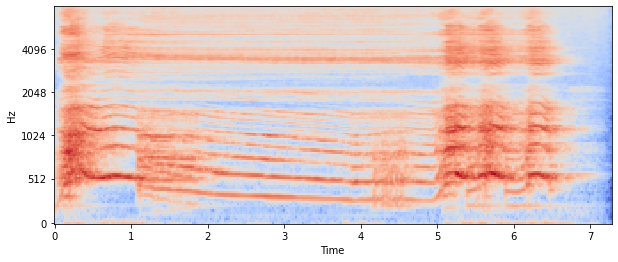

In [12]:
import librosa.display
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10, 4))
img = librosa.display.specshow(audios[0], x_axis='time', y_axis='mel', fmax=8000)
plt.savefig("out.png")
plt.show()

##### Getting  high energy features to avoid silent region and low amplitude noise regions as described in report

In [13]:
def get_highFeatures(inp, num):
    if inp.shape[1] < num:
        inp=np.concatenate((inp, np.zeros((128, num-inp.shape[1]))), axis=1)
    features_ = np.sum(inp, axis=0)
    list_f = [[features_[i],i] for i in range(len(features_))]
    temp_f = sorted(list_f,key = lambda x:-x[0])
    temp_top_f = temp_f[:num]
    final_f = sorted(temp_top_f,key = lambda x:x[1])
    list_top_f = [inp[:,final_f[i][1]] for i in range(len(final_f))]
    return np.array(list_top_f).transpose()

In [14]:
for i in range(len(features)):
    features[i]=get_highFeatures(features[i], 64)
    print(features[i].shape)


(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)


(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)


In [15]:
y=data['label']
y_=list(y)
for ind, i in enumerate(y):
#     print(ind)
    y_.append(i)
y=np.array(y_)
len(y)


2000

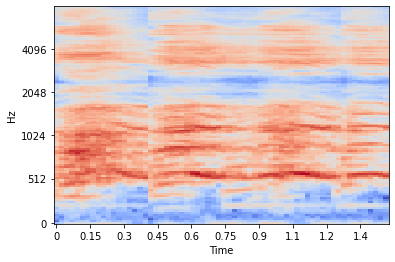

In [16]:
# spectogram of filtered spectogram
img = librosa.display.specshow(features[0], x_axis='time', y_axis='mel', fmax=8000)


### Gaussian augmentation

In [17]:
from scipy.ndimage import gaussian_filter
def gauss(inp, var):
    return gaussian_filter(inp, var)
temp=features
for i in range(len(features)):
#     print(i)
    temp.append(gauss(features[i], .6))
final=temp

In [18]:
i=0
for mat in features:
    mat=mat.reshape(1, mat.shape[0], mat.shape[1])
    features[i]= tf.convert_to_tensor(mat)
    i=i+1
features[0].shape

TensorShape([1, 128, 64])

In [19]:
X=np.array(features)
type(X)
print(X.shape)

(2000, 1, 128, 64)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

print(y_test.shape)
val_label=pd.Series(list(y_test))
val_label.value_counts()
# data={"val":y_test}
# ldf=pd.DataFrame(data, index=["label"])
# ldf["val"].value_counts()


(400,)


Crying_and_sobbing                       47
Bark                                     47
Siren                                    45
Meow                                     41
Doorbell                                 40
Microwave_oven                           39
Vehicle_horn_and_car_horn_and_honking    38
Knock                                    36
Shatter                                  34
Walk_and_footsteps                       33
dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
test_encoder = LabelEncoder()
print(y_test[:20])
test_ = test_encoder.fit_transform(y_test)
print(test_)
to_onehot=to_categorical(test_)
y_test=to_onehot
train_encoder = LabelEncoder()
train_ = train_encoder.fit_transform(y_train)
to_onehot=to_categorical(train_)
y_train=to_onehot

['Vehicle_horn_and_car_horn_and_honking' 'Microwave_oven'
 'Walk_and_footsteps' 'Shatter' 'Knock' 'Siren' 'Shatter' 'Knock' 'Siren'
 'Microwave_oven' 'Crying_and_sobbing' 'Microwave_oven' 'Meow'
 'Vehicle_horn_and_car_horn_and_honking' 'Bark' 'Walk_and_footsteps'
 'Meow' 'Vehicle_horn_and_car_horn_and_honking' 'Siren' 'Microwave_oven']
[8 5 9 6 3 7 6 3 7 5 1 5 4 8 0 9 4 8 7 5 1 6 0 2 0 8 4 2 3 1 2 8 9 1 8 9 0
 0 7 9 4 3 6 3 0 9 9 6 4 6 8 4 8 0 4 6 7 4 2 1 7 2 5 8 7 3 7 3 7 4 5 1 6 6
 7 9 7 8 8 2 6 8 1 7 1 3 0 7 0 5 1 7 7 1 3 9 5 1 6 8 2 8 3 1 5 0 0 7 2 9 4
 0 4 4 2 1 7 6 5 8 9 3 4 0 5 2 1 6 9 0 1 0 1 6 3 1 0 1 9 1 4 4 3 1 2 8 4 1
 2 2 0 5 3 4 7 6 1 4 7 0 5 7 0 8 0 4 9 3 8 5 6 1 2 6 8 4 9 2 1 8 0 3 0 2 3
 7 4 0 5 7 4 9 6 2 0 9 8 2 1 7 8 6 2 4 8 5 0 0 0 4 3 3 3 9 8 9 1 0 9 5 8 1
 6 2 3 2 5 3 8 0 3 3 7 4 5 9 1 2 0 5 0 8 3 1 7 7 0 4 5 2 2 7 8 2 5 1 1 2 9
 3 1 2 6 9 5 7 6 3 2 7 8 0 5 3 9 0 8 8 2 1 6 2 6 0 0 1 1 4 9 7 3 6 4 6 6 8
 6 7 5 5 1 0 4 7 9 3 5 2 1 1 9 2 0 4 8 6 2 5 6 3 8 2 3 1 0 0 7

In [24]:
# print(test_)

In [122]:
from tensorflow.keras.regularizers import L2 as l2
def create_model(input_shape, alpha=0.05, reg=0.001):
    inputs = tf.keras.Input(shape=input_shape)
# Layer 1
    x = tf.keras.layers.Conv2D(64, (5, 5), padding='same', strides=(2, 2), 
               activation=None)(inputs)
    #x=squeeze_excite_block(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', strides=(2, 2),
               activation=None)(x)
   # x=squeeze_excite_block(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3

    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Conv2D(256, (3, 3), padding='same', strides=(2, 2),
               activation=None)(x)
    #x=squeeze_excite_block(x)
    #x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

# FC1    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(72, activation='linear', kernel_regularizer=l2(reg))(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(72, activation='linear', kernel_regularizer=l2(reg))(x)
    x = tf.keras.layers.LeakyReLU(alpha=alpha)(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = tf.keras.layers.Dense(10, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=x)

    return model

In [60]:
from keras import backend as K
from sklearn.metrics import precision_score , recall_score
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [124]:
# filepath = '7*7_SE_weights.{epoch:02d}-{val_loss:.2f}.h5'
file=os.getcwd()
filepath=os.path.join(file, "./cnn_max_filtering_saved_models/SE_7_7_{epoch:02d}.h5")

In [125]:
os.getcwd()

'C:\\Users\\dell\\Documents\\Courses\\MLSP\\models\\PCA'

In [126]:
from keras.callbacks import ReduceLROnPlateau
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0.01,
                              patience=7,
                              mode='auto')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2)

In [127]:
X_train[0].shape
X_train.shape

(1600, 1, 128, 64)

In [128]:
# X_train = numpy.asarray(X_train).astype(numpy.array)
# y_train = numpy.asarray(y_train).astype(numpy.array)
from matplotlib import pyplot as plt
model = create_model(input_shape=X_train.shape[1:])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 128, 64)]      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 64, 64)         102464    
                                                                 
 batch_normalization_12 (Bat  (None, 1, 64, 64)        256       
 chNormalization)                                                
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 1, 64, 64)         0         
                                                                 
 dropout_20 (Dropout)        (None, 1, 64, 64)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 32, 128)        73856     
                                                           

In [129]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40, verbose = 2, callbacks=[model_checkpoint_callback])

Epoch 1/40
50/50 - 34s - loss: 2.2799 - accuracy: 0.2856 - f1_m: 0.0901 - precision_m: 0.3867 - recall_m: 0.0544 - val_loss: 2.1313 - val_accuracy: 0.4200 - val_f1_m: 0.0546 - val_precision_m: 0.6154 - val_recall_m: 0.0288 - 34s/epoch - 674ms/step
Epoch 2/40
50/50 - 3s - loss: 1.7950 - accuracy: 0.4394 - f1_m: 0.3284 - precision_m: 0.7093 - recall_m: 0.2269 - val_loss: 1.9078 - val_accuracy: 0.5400 - val_f1_m: 0.1198 - val_precision_m: 0.9231 - val_recall_m: 0.0649 - 3s/epoch - 57ms/step
Epoch 3/40
50/50 - 3s - loss: 1.5138 - accuracy: 0.5706 - f1_m: 0.4839 - precision_m: 0.7523 - recall_m: 0.3706 - val_loss: 1.3399 - val_accuracy: 0.6925 - val_f1_m: 0.4764 - val_precision_m: 0.9258 - val_recall_m: 0.3269 - 3s/epoch - 55ms/step
Epoch 4/40
50/50 - 3s - loss: 1.2980 - accuracy: 0.6413 - f1_m: 0.5969 - precision_m: 0.7625 - recall_m: 0.4969 - val_loss: 1.1886 - val_accuracy: 0.7375 - val_f1_m: 0.5990 - val_precision_m: 0.9043 - val_recall_m: 0.4543 - 3s/epoch - 57ms/step
Epoch 5/40
50/50 

Epoch 35/40
50/50 - 3s - loss: 0.3819 - accuracy: 0.9506 - f1_m: 0.9554 - precision_m: 0.9677 - recall_m: 0.9438 - val_loss: 0.4036 - val_accuracy: 0.9475 - val_f1_m: 0.9490 - val_precision_m: 0.9587 - val_recall_m: 0.9399 - 3s/epoch - 53ms/step
Epoch 36/40
50/50 - 3s - loss: 0.3989 - accuracy: 0.9531 - f1_m: 0.9548 - precision_m: 0.9658 - recall_m: 0.9444 - val_loss: 0.4922 - val_accuracy: 0.9200 - val_f1_m: 0.9130 - val_precision_m: 0.9305 - val_recall_m: 0.8966 - 3s/epoch - 53ms/step
Epoch 37/40
50/50 - 3s - loss: 0.4115 - accuracy: 0.9381 - f1_m: 0.9431 - precision_m: 0.9581 - recall_m: 0.9294 - val_loss: 0.3514 - val_accuracy: 0.9700 - val_f1_m: 0.9657 - val_precision_m: 0.9777 - val_recall_m: 0.9543 - 3s/epoch - 55ms/step
Epoch 38/40
50/50 - 3s - loss: 0.4136 - accuracy: 0.9362 - f1_m: 0.9383 - precision_m: 0.9547 - recall_m: 0.9231 - val_loss: 0.3913 - val_accuracy: 0.9575 - val_f1_m: 0.9591 - val_precision_m: 0.9800 - val_recall_m: 0.9399 - 3s/epoch - 53ms/step
Epoch 39/40
50/5

In [139]:
# from keras.models import load_model
# loaded = load_model('cnn_max_filtering_saved_models/SE_7_7_37.h5', custom_objects={"lr": lr_track })

## Testing our best saved model on unseen data 

In [56]:
loaded = tf.keras.models.load_model('cnn_max_filtering_saved_models/SE_7_7_37.h5', custom_objects={'f1_m':tf.keras.metrics.CategoricalAccuracy(name="f1_m"),'precision_m':tf.keras.metrics.CategoricalAccuracy(name="precision_m"), 'recall_m':tf.keras.metrics.CategoricalAccuracy(name="recall_m") })

In [57]:
pred=loaded.predict(X_test)

13/13 [==============================] - 1s 40ms/step


In [58]:
def compute_accuracy(y_true, y_pred):
    correct_predictions = sum([1 for i in range(len(y_true)) if np.all(y_true[i]==y_pred[i])])
    # iterate over each label and check
#     for i in range(len(y_true)):
#         if y_true[i] == x_true[i]:
#             correct_predictions += 1
    
    # compute the accuracy
    accuracy = correct_predictions/len(y_true)
    return accuracy

# Calculating precision, recall accuracy and F1 score

In [61]:
precision=precision_m(y_test, pred)
recall=recall_m(y_test, pred)
f1=f1_m(y_test, pred)
print("precision:{}, recall:{}, f1: {}".format(precision, recall, f1))

precision:0.9795396327972412, recall:0.9574999809265137, f1: 0.96839439868927


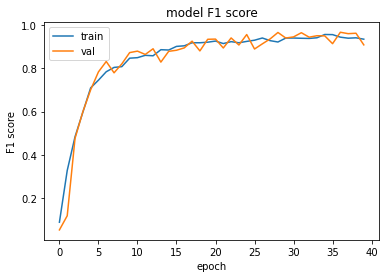

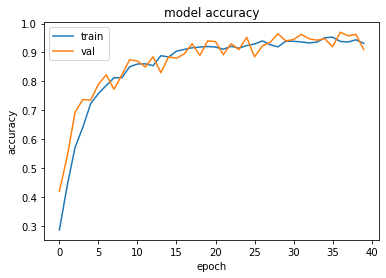

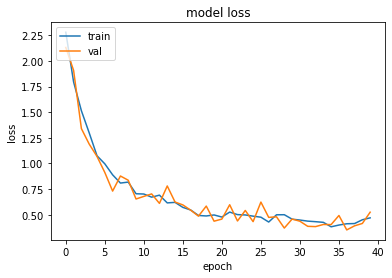

In [147]:
model.metrics_names
plt.plot(history.history['f1_m'])
plt.plot(history.history['val_f1_m'])
plt.title('model F1 score')
plt.ylabel('F1 score')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# path_save=os.path.join(path, "Documents", "courses", "MLSP", "models")
# model.save(path_save)

[8 5 9 6 3 7 6 3 7 5 1 5 4 8 0 9 4 8 7 5 1 6 0 2 0 8 4 2 3 1 2 8 9 1 8 9 0
 0 7 9 4 9 6 3 0 9 9 6 4 6 8 7 8 0 4 6 7 7 2 1 7 2 5 8 7 9 7 3 7 4 5 1 6 6
 7 9 7 8 8 2 6 8 1 7 1 3 0 7 0 5 1 7 7 1 3 9 5 1 6 8 2 8 3 1 5 0 0 7 2 9 4
 0 4 4 2 1 7 6 5 8 9 3 4 0 5 2 1 6 9 0 1 0 1 6 3 1 0 1 9 1 4 4 3 1 2 8 4 1
 2 2 0 5 3 4 7 6 1 4 7 3 5 7 0 8 0 4 9 3 8 5 6 1 2 6 8 4 9 2 1 8 0 3 0 2 3
 7 4 0 5 7 4 9 6 2 0 9 8 2 1 7 8 6 2 4 8 5 0 0 0 4 3 3 3 3 8 9 1 0 9 5 8 1
 6 2 3 2 5 3 8 0 3 3 7 4 3 9 1 2 0 5 0 8 3 1 7 7 0 4 5 2 2 7 8 2 5 1 1 2 9
 3 1 2 6 9 5 7 6 6 2 7 8 0 5 3 9 0 8 8 2 1 6 2 6 0 0 1 1 4 9 7 3 6 4 6 6 8
 6 7 5 5 1 0 4 7 6 3 5 2 1 1 9 2 0 4 8 6 2 5 6 3 8 2 3 1 0 0 7 0 4 2 7 5 0
 0 7 5 4 3 5 6 4 0 9 7 2 6 3 8 0 9 1 1 7 9 8 5 8 1 7 7 4 6 5 2 5 5 7 4 8 6
 7 7 9 4 7 2 9 2 0 7 4 4 3 3 6 4 3 5 3 5 4 1 1 7 4 1 2 1 0 5]
[8 5 9 6 3 7 6 3 7 5 1 5 4 8 0 9 4 8 7 5 1 6 0 2 0 8 4 2 3 1 2 8 9 1 8 9 0
 0 7 9 4 3 6 3 0 9 9 6 4 6 8 4 8 0 4 6 7 4 2 1 7 2 5 8 7 3 7 3 7 4 5 1 6 6
 7 9 7 8 8 2 6 8 1 7 1 3 0 7 0 5 1 7 7

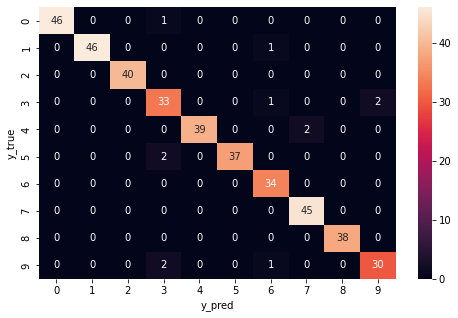

Accuracy: 0.97


In [62]:
# accuracy = model.evaluate(X_test, y_test)
# print('n', 'Test_Accuracy:-', accuracy[1])
# pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
predictions_index = np.argmax(pred, axis=1)
print(predictions_index)
y_true = np.argmax(y_test, axis=1)
print(y_true)
cf = confusion_matrix(y_true, predictions_index)
print('confusion matrix')
print(cf)
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print("Accuracy:", compute_accuracy(y_true, y_pred))
# accuracy

#  Evaluation of F1 score on unseen data

In [63]:
import csv
for file in os.listdir('./evaluation'):
    ev_data={'field':os.listdir('./evaluation')}

In [64]:
ev_data

{'field': ['MLSP_test1053175.npy',
  'MLSP_test1071.npy',
  'MLSP_test1077269.npy',
  'MLSP_test1116162.npy',
  'MLSP_test113179.npy',
  'MLSP_test1134284.npy',
  'MLSP_test1140162.npy',
  'MLSP_test1163322.npy',
  'MLSP_test1186185.npy',
  'MLSP_test1192345.npy',
  'MLSP_test1194176.npy',
  'MLSP_test1205141.npy',
  'MLSP_test1216256.npy',
  'MLSP_test1235269.npy',
  'MLSP_test1277465.npy',
  'MLSP_test1289164.npy',
  'MLSP_test1301172.npy',
  'MLSP_test130220.npy',
  'MLSP_test1306499.npy',
  'MLSP_test130845.npy',
  'MLSP_test132489.npy',
  'MLSP_test1328457.npy',
  'MLSP_test1353495.npy',
  'MLSP_test1357311.npy',
  'MLSP_test1362223.npy',
  'MLSP_test1373407.npy',
  'MLSP_test1379148.npy',
  'MLSP_test1395138.npy',
  'MLSP_test1404304.npy',
  'MLSP_test140846.npy',
  'MLSP_test1443477.npy',
  'MLSP_test1451403.npy',
  'MLSP_test1457299.npy',
  'MLSP_test1458291.npy',
  'MLSP_test1475459.npy',
  'MLSP_test149028.npy',
  'MLSP_test1498106.npy',
  'MLSP_test1515407.npy',
  'MLSP_test

In [65]:
ev_audios=[]
i=0
ev_path=os.path.join(os.getcwd(), "evaluation")
ev_files=ev_data["field"]
for file in ev_files:
    arr=np.load(os.path.join(ev_path, file))
    m,n,o=arr.shape
    arr.resize(n,o)
#     print(arr.shape)
    mel_spect = librosa.power_to_db(arr, ref=np.median)
    ev_audios.append(mel_spect)
    i=i+1
ev_features=ev_audios

In [66]:
len(ev_features)

201

In [67]:
for i in range(len(ev_features)):
    ev_features[i]=get_highFeatures(ev_features[i], 64)
    print(ev_features[i].shape)

(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)
(128, 64)


In [68]:
i=0
for mat in ev_features:
    mat=mat.reshape(1, mat.shape[0], mat.shape[1])
    ev_features[i]= tf.convert_to_tensor(mat)
    i=i+1
Y_ev=np.array(ev_features)

In [69]:
pred=loaded.predict(Y_ev)
pred

7/7 [==============================] - 0s 40ms/step


array([[1.75775498e-01, 2.01653130e-03, 2.91195814e-03, ...,
        2.82403594e-03, 3.12305929e-05, 2.94584082e-03],
       [4.01989710e-05, 1.83924360e-08, 2.88658919e-09, ...,
        6.90302113e-03, 9.22998965e-01, 6.82370097e-04],
       [1.14775105e-06, 9.67249614e-10, 1.10347031e-07, ...,
        2.39836936e-07, 6.61669048e-08, 1.37839392e-02],
       ...,
       [2.24499104e-08, 9.19349180e-11, 4.17911261e-11, ...,
        1.06220946e-12, 1.15784793e-09, 1.57018215e-03],
       [1.50597679e-09, 1.77905062e-15, 2.11997405e-14, ...,
        1.07251054e-13, 4.29478024e-12, 2.58762942e-04],
       [2.20047259e-05, 5.27829776e-12, 1.05696722e-08, ...,
        2.14401189e-05, 9.18352339e-10, 9.06111021e-03]], dtype=float32)

In [70]:
y_pred = np.argmax(pred, axis=1)

In [71]:
y_pred

array([4, 8, 3, 4, 0, 4, 5, 4, 4, 4, 3, 4, 4, 4, 4, 1, 4, 0, 4, 4, 4, 9,
       5, 3, 5, 3, 3, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 6, 6, 9, 6,
       6, 5, 5, 9, 6, 6, 6, 6, 6, 6, 0, 5, 6, 6, 6, 0, 6, 7, 1, 9, 7, 7,
       9, 5, 7, 3, 7, 7, 7, 7, 3, 2, 7, 7, 7, 8, 8, 8, 8, 3, 8, 8, 8, 8,
       8, 3, 8, 8, 9, 8, 8, 8, 8, 9, 5, 7, 0, 9, 3, 9, 3, 3, 9, 9, 9, 6,
       9, 9, 3, 9, 9, 9, 6, 9, 0, 0, 3, 0, 3, 0, 0, 0, 8, 0, 0, 0, 0, 8,
       2, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 1, 1, 1, 9, 1, 2, 1, 0, 0, 3, 6,
       2, 2, 3, 2, 2, 2, 5, 8, 2, 8, 2, 0, 2, 2, 3, 2, 2, 2, 8, 2, 8, 2,
       3, 8, 8, 0, 3, 8, 5, 3, 3, 7, 8, 3, 3, 7, 4, 6, 3, 3, 3, 3, 3, 3,
       3, 3, 3], dtype=int64)